# Using Keras to classify handwritten digits Using MNIST Dataset

## 1. Prepare & Explore Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
# import pachages 
from tensorflow import keras 
from keras.datasets import mnist 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation 
from keras.utils import np_utils 

In [3]:
# load the training and testing data. 
# (X_train, Y_train) are the training images and labels, 
# (X_test, Y_test) are the test images and labels

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [8]:
X_train, Y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
X_test, Y_test

In [9]:
# We need to modify the data to be able to use it. X_train contains 60,000 28 x 28 pixel images, and X_test contains 10,000.
# To feed them to the network as inputs, we want to reshape each sample as a 784-pixel array, 
## rather than a (28,28) 2-dimensional matrix. 
# We can accomplish this with these two lines:

X_train = X_train.reshape(60000, 784)      
X_test = X_test.reshape(10000, 784) 

In [10]:
X_train, X_train.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (60000, 784))

In [11]:
X_test, X_test.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 (10000, 784))

In [12]:
# The labels indicate the value of the digit depicted in the images. 
# We want to convert this into a 10-entry encoded vector comprised of 0s and 1 in the entry corresponding to the digit. 
# For example, 4 is mapped to [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 
# Conversely, our network will have 10 output neurons

classes = 10 
Y_train = np_utils.to_categorical(Y_train, classes)      
Y_test = np_utils.to_categorical(Y_test, classes) 

In [13]:
Y_train, Y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

## 2. Define the neural network architecture

In [14]:
# Before calling our main function, we need to set :
## the size of the input layer (the size of the MNIST images), 
## the number of hidden neurons, 
## the number of epochs to train the network, 
## the mini batch size:

input_size = 784 
batch_size = 100      
hidden_neurons = 100      
epochs = 100

In [15]:
model = Sequential([
    Dense(hidden_neurons, input_dim=input_size),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
]) 

## 3. Compile the neural net

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

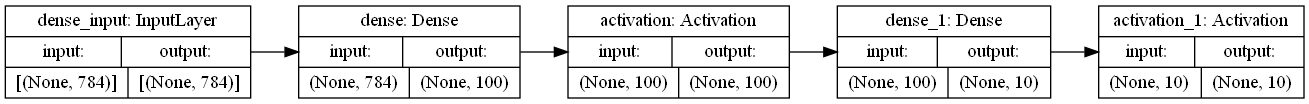

In [17]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

## 4. Fit / train the neural net

In [18]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1) 

Epoch 1/100
600/600 [==============================] - 1s 751us/step - loss: 1.3342 - accuracy: 0.6196
Epoch 2/100
600/600 [==============================] - 0s 748us/step - loss: 0.5282 - accuracy: 0.8755
Epoch 3/100
600/600 [==============================] - 0s 735us/step - loss: 0.4050 - accuracy: 0.8965
Epoch 4/100
600/600 [==============================] - 1s 882us/step - loss: 0.3542 - accuracy: 0.9077
Epoch 5/100
600/600 [==============================] - 1s 951us/step - loss: 0.3207 - accuracy: 0.9150
Epoch 6/100
600/600 [==============================] - 1s 921us/step - loss: 0.2958 - accuracy: 0.9209
Epoch 7/100
600/600 [==============================] - 1s 881us/step - loss: 0.2796 - accuracy: 0.9253
Epoch 8/100
600/600 [==============================] - 1s 882us/step - loss: 0.2650 - accuracy: 0.9274
Epoch 9/100
600/600 [==============================] - 0s 814us/step - loss: 0.2540 - accuracy: 0.9316
Epoch 10/100
600/600 [==============================] - 0s 738us/step - l

## 5. Evaluate the neural net

In [19]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Test accuracy:', score[1]) 

313/313 [==============================] - 0s 502us/step - loss: 0.1202 - accuracy: 0.9633
Test accuracy: 0.9632999897003174


## 6. Make predictions / classifications for unseen data

In [20]:
#not yet until we enhanced the results
predictions = model.predict(X_test)
predictions

array([[2.2499098e-06, 9.0058893e-06, 2.1370495e-04, ..., 9.9944431e-01,
        9.5456346e-07, 1.8858127e-05],
       [5.1176903e-04, 3.5238878e-03, 9.8659480e-01, ..., 8.7109565e-06,
        8.0965325e-04, 1.8214442e-06],
       [3.3645546e-07, 9.9926156e-01, 2.7820151e-04, ..., 2.0082793e-04,
        5.4758559e-05, 7.3311012e-06],
       ...,
       [1.4397752e-07, 3.3628774e-06, 1.4708672e-05, ..., 1.5689414e-04,
        5.2107323e-04, 1.4624527e-03],
       [5.8550877e-04, 3.0973942e-03, 3.8389757e-04, ..., 4.3055727e-05,
        4.5891270e-02, 2.5504200e-05],
       [9.0980575e-05, 1.6009022e-05, 4.2505338e-04, ..., 1.7255367e-06,
        3.0155705e-05, 3.3327713e-06]], dtype=float32)

<hr>

# To see what the network has learned, we can visualize the weights of the hidden layer. 

In [21]:
weights = model.layers[0].get_weights() 

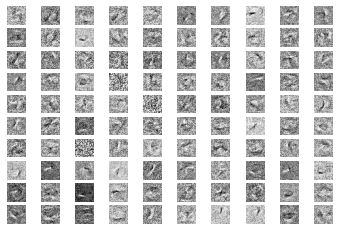

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()

w = weights[0].T
for neuron in range(hidden_neurons):
 ax = fig.add_subplot(10, 10, neuron + 1)
 ax.axis("off")
 ax.imshow(numpy.reshape(w[neuron], (28, 28)), cmap=cm.Greys_r)

plt.savefig("neuron_images.png", dpi=300)
plt.show()



<p> For simplicity, we've aggregated the images of all neurons in a single figure that represents a composite of all neurons. Clearly, since the initial images are very small and do not have lots of details (they are just digits), the features learned by the hidden neurons are not all that interesting. But it's already clear that each neuron is learning a different shape.

